# Implementing LeNet5 on MNIST Kaggle Dataset - Ensemble with TensorFlow - Accuracy=99.75%

### [Dataset Link](https://www.kaggle.com/competitions/digit-recognizer)




In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import warnings
warnings.filterwarnings("ignore")

## Load 42,000 training images and 28,000 test images

In [2]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")


In [3]:
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [5]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

# Given images are not already normalized (i.e. the pixel values are in the range [0,255]).
# So normalize them by dividing by 255
X_train = X_train / 255.0
test = test / 255.0


In [6]:
X_train.values.shape

(42000, 784)

Now note, the axis order for an image tensor in Tensorflow is as follows:
shape=(N, H, W, C)

* N — batch size (number of images per batch)
* H — height of the image
* W — width of the image
* C — number of channels (usually uses 3 channels for RGB)


On the other hand, the shape for image tensor in Pytorch is slightly different from Tensorflow tensor. It is based on the following torch.Size instead:
torch.Size([N, C, H, W])

* N — batch size (number of images per batch)
* C — number of channels (usually uses 3 channels for RGB)
* H — height of the image
* W — width of the image

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

## to_categorical

Converts a class vector (integers) to binary class matrix. A binary matrix representation of the input.

## Why we need to_categorical

A classification model with multiple classes doesn't work well if you don't have classes distributed in a binary matrix.

The reason you want to_categorical (even on numeric labels) is due to how the relationship between your labels is understood by the algorithm.

For example, suppose you made a color classifier. You mark red as 1, blue as 2, and orange as 3.

Now you feed them into the machine learning algorithm to help decide what your input matches. The math is going to say that orange is higher than red. This obviously isn't your intent, but the network will know that orange is greater than red.

### Another example

Suppose you have three clasess, the vector goes like this:

- [1, 0, 0] = class 1     
- [0, 1, 0] = class 2    
- [0, 0, 1] = class 3

You use `to_categorical` to transform your training data before you pass it to your model. 

If your training data uses classes as numbers, `to_categorical` will transform those numbers in proper vectors for using with models. You can't simply train a classification model without that. 

In [8]:
X_train.shape

(42000, 28, 28, 1)

## Augmentation 

Following Augmentation have been applied on this set of 42,000 images training images.

### 1. rotation_range:

To randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.

When the image is rotated, some pixels will move outside the image and leave an empty area that needs to be filled in. You can fill this in different ways like a constant value or nearest pixel values, etc. This is specified in the fill_mode argument and the default value is “nearest” which simply replaces the empty area with the nearest pixel values.


### 2. zoom_range = 0.10,  


### 3. Random Shifts with width_shift_range and height_shift_range

It may happen that the object may not always be in the center of the image. To overcome this problem we can shift the pixels of the image either horizontally or vertically; this is done by adding a certain constant value to all the pixels.

ImageDataGenerator class has the argument height_shift_range for a vertical shift of image and width_shift_range for a horizontal shift of image. If the value is a float number, that would indicate the percentage of width or height of the image to shift. Otherwise, if it is an integer value then simply the width or height are shifted by those many pixel values.



### 4. vertical_flip and horizontal_flip

ImageDataGenerator class has parameters horizontal_flip and vertical_flip  for flipping along the vertical or the horizontal axis. However, this technique should be according to the object in the image. For example, vertical flipping of a car would not be a sensible thing compared to doing it for a symmetrical object like football or something else. 


### 5. brightness_range

Brightness can be controlled in the ImageDataGenrator class through the brightness_range argument. It accepts a list of two float values and picks a brightness shift value from that range. Values less than 1.0 darkens the image, whereas values above 1.0 brighten the image.

## Plot Images before Augmentation

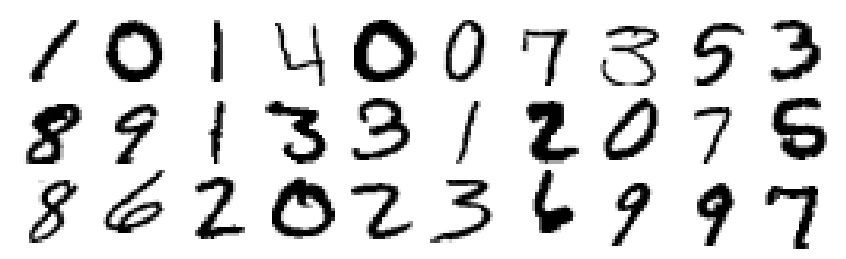

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [10]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images through any degree between 0 and 360
        zoom_range = 0.10,  
        width_shift_range=0.1, # a float number, that would indicate the percentage of width or height of the image to shift. 
        height_shift_range=0.1)

# datagen = ImageDataGenerator(
#         rotation_range=10,  
#         zoom_range = 0.10,  
#         width_shift_range=0.1, 
#         height_shift_range=0.1,
#         horizontal_flip=True,
#         vertical_flip=True,
#         brightness_range=[0.2,1.1],
#         )

In [11]:
X_train.shape # (42000, 28, 28, 1)
X_train[25,].shape # (28, 28, 1)
X_train[25,].reshape((1,28,28,1)).shape # (1, 28, 28, 1)


(1, 28, 28, 1)

### Each row of the total 42,000 rows represent a single image - now take a single one from them. lets say the image at row-index number 25

In [12]:
X_train[25,].shape

(28, 28, 1)

In [13]:
X_train[41999,].shape

(28, 28, 1)

### First see what this 25-row index image is

So below plot is before Augmentation

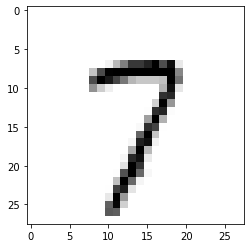

In [14]:
# plt.imshow(X_train[25,].reshape((28,28)),cmap=plt.cm.binary)
# plt.imshow(X_train[11,].reshape((28,28)),cmap=plt.cm.binary)
plt.imshow(X_train[18,].reshape((28,28)),cmap=plt.cm.binary)

## Plot a single Augmented Images by taking a single row of of data from the 42,000 number of samples

X_train[25,] => Will return all the columns but only row-index number 9

But to plot with the use of `datagen.flow` - I have to convert the above randomly selected row to a 4-D Tensor of shape `(1,28,28,1)`

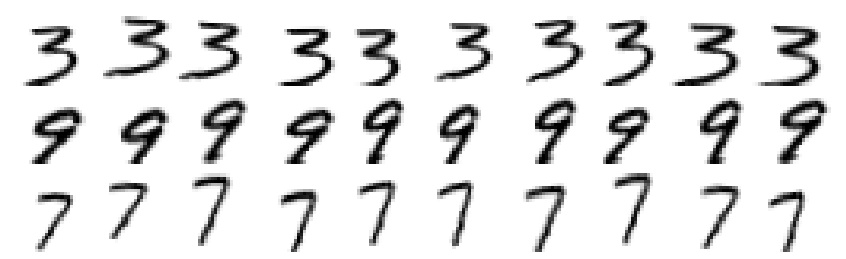

In [15]:
X_train_random = X_train[25,].reshape((1,28,28,1))
Y_train_random = Y_train[25,].reshape((1,10))

plt.figure(figsize=(15,4.5))

for i in range(30):  
    plt.subplot(3, 10, i+1)
    X_train_augmented, Y_train_augmented = datagen.flow(X_train_random,Y_train_random).next()
    plt.imshow(X_train_augmented[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    # Now for the second and third row take 2 different digit
    # 9 and 7 respectively
    # And because I am printing 9 columns for the same image, I have to 
    # advance the 'i' value by 10
    if i==9:
        X_train_random = X_train[11,].reshape((1,28,28,1))
    if i==19:
        X_train_random = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

---

### Build 15 Convolutional Neural Networks with bagging

### LeNet Architectural
![Imgur](https://imgur.com/by2Dc72.png)

In [16]:
def build_model(num_cnn):
    model = [0] *num_cnn
    for j in range(num_cnn):
        model[j] = Sequential()

        model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1))) # Two stacked 3x3 filters instead of single 5x5 filters. 
        model[j].add(BatchNormalization()) # Batch normalization is added
        model[j].add(Conv2D(32, kernel_size = 3, activation='relu')) # and ReLU activation replaces sigmoid.
        model[j].add(BatchNormalization())
        model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu')) # Stride 2 replaces pooling layers. These become learnable pooling layers.
        model[j].add(BatchNormalization())
        model[j].add(Dropout(0.4)) #  Dropout is added

        model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
        model[j].add(BatchNormalization())
        model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
        model[j].add(BatchNormalization())
        model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
        model[j].add(BatchNormalization())
        model[j].add(Dropout(0.4))

        model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
        model[j].add(BatchNormalization())
        model[j].add(Flatten())
        model[j].add(Dropout(0.4))
        model[j].add(Dense(10, activation='softmax'))

        model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model
    

In [17]:
# num_cnn=1 # First running for 1 num_cnn only to check all is working fine
num_cnn=10
model = build_model(num_cnn)

2022-04-19 13:17:11.137473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 13:17:11.226537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 13:17:11.227317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 13:17:11.228457: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

## Train 10 CNNs

In [18]:
def train(num_epochs):
    # Keep reducing the Learning Rate
    lr_scheduler = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
    # Training starts
    history = [0] * num_cnn
    for cnn in range(num_cnn):
        X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(
            X_train, Y_train, test_size=0.1
        )
        history[cnn] = model[cnn].fit(
            datagen.flow(X_train_split, Y_train_split, batch_size=64),
            epochs=num_epochs,
            steps_per_epoch=X_train_split.shape[0] // 64,
            validation_data=(X_val_split, Y_val_split),
            callbacks=[lr_scheduler],
            verbose=0,
        )
        print(
            "CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
                cnn + 1,
                num_epochs,
                max(history[cnn].history["accuracy"]),
                max(history[cnn].history["val_accuracy"]),
            )
        )

In [19]:
# num_epochs = 1  # First running for 1 epoch only to check all is working fine
num_epochs = 45
train(num_epochs)

2022-04-19 13:17:14.167958: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-19 13:17:15.731207: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CNN 1: Epochs=1, Train accuracy=0.85552, Validation accuracy=0.96452


## Total image count

42,000 number of samples images * 90% Train Split Dataset * 45 epochs * 10 CNN => 17 Million

---

## [LearningRateScheduler](https://keras.io/api/callbacks/learning_rate_scheduler/)


`tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)`

At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at `__init__`, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.

Arguments

schedule: a function that takes an epoch index (integer, indexed from 0) and current learning rate (float) as inputs and returns a new learning rate as output (float).
verbose: int. 0: quiet, 1: update messages.


# Ensemble 10 CNN predictions and submit

In [20]:
X_test.shape

(28000, 28, 28, 1)

In [21]:
final_ensemble_prediction = np.zeros( (X_test.shape[0],10) )

final_ensemble_prediction.shape

(28000, 10)

# Final ensemble

In [22]:
for j in range(num_cnn):
    final_ensemble_prediction = np.zeros( (X_test.shape[0],10) )
    final_ensemble_prediction = final_ensemble_prediction + model[j].predict(X_test)

    final_ensemble_prediction = np.argmax(final_ensemble_prediction,axis = 1)
    
#     print("final_ensemble_prediction.shape ", final_ensemble_prediction.shape)

    final_ensemble_prediction = pd.Series(final_ensemble_prediction,name="Label")

    submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),final_ensemble_prediction],axis = 1)

    submission.to_csv("MNIST_ensemble_cnn.csv",index=False)
    
    print('success')

success


#### Some References

1. https://www.kaggle.com/code/friskycodeur/image-recognition-using-cnn-explained/notebook
2. https://www.kaggle.com/code/mohammedmurtuzalabib/mnist-ensemble-of-5-cnns-0-99742/notebook

## Bonus Point - A Note on `model[cnn].fit_` method used inside my train() method above

As mentioned in the [documentation][1] : 

>  x: Input data. It could be
>  - A Numpy array (or array-like), or a list of arrays (in case the model has multiple inputs). 
>  - A TensorFlow tensor, or a list of tensors (in case the model has multiple inputs).
>  - A dict mapping input names to the corresponding array/tensors, if the
>      model has named inputs. 
>  - A tf.data dataset. Should return a tuple of either (inputs, targets) or (inputs, targets, sample_weights)
>  - *A generator or keras.utils.Sequence returning (inputs, targets) or (inputs, targets, sample weights).


you can simply pass the generator to `Model.fit` as below

```py

data_gen_train = ImageDataGenerator(rescale=1/255.)

data_gen_valid = ImageDataGenerator(rescale=1/255.)

train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(128,128), batch_size=128, class_mode="binary")

valid_generator = data_gen_valid.flow_from_directory(validation_dir, target_size=(128,128), batch_size=128, class_mode="binary")

model.fit(train_generator, epochs=2, validation_data=valid_generator) 

```

  [1]: https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/Model#fit


---